<a href="https://colab.research.google.com/github/Steevencruz903/Proyecto-MBD-2025/blob/main/Proyecto%20MBD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANÁLISIS DEL COMPORTAMIENTO TRANSACCIONAL EN LOS DIFERENTES CANALES BANCARIOS DEL ECUADOR: UN ENFOQUE HACIA LA OPTIMIZACIÓN DE ESTRATEGIAS DE SERVICIOS BANCARIOS**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Recolección de datos**

In [ ]:
df = pd.read_excel("/content/BDD ESTRUCTURA A06.xlsx")
df

,Año,Mes,Entidad financiera,Tipo de entidad,Canal,Provincia,Cantón,Tipo de cargo,Servicio,Servicio Genérico,Servicio grupo,Nro. Transacciones,Ingresos,Tarifa
0,2025,enero,Banco Amazonas,Banco privado,Oficina,Guayas,Guayaquil,Servicios con cargo mÃ¡ximo,Emisión de referencias bancarias,Servicios de referencias: Referencias bancaria...,17. Servicios de certificaciones,130,292.50,2.25
1,2025,enero,Banco Amazonas,Banco privado,Oficina,Pichincha,Quito,Servicios con cargo mÃ¡ximo,Emisión de referencias bancarias,Servicios de referencias: Referencias bancaria...,17. Servicios de certificaciones,74,166.50,2.25
2,2025,enero,Banco Amazonas,Banco privado,Oficina,Guayas,Guayaquil,Servicios con cargo mÃ¡ximo,Cheque certificado,Servicios con cuentas corrientes,2. Servicios con cheques,82,146.78,1.79
3,2025,enero,Banco Amazonas,Banco privado,Oficina,Pichincha,Quito,Servicios con cargo mÃ¡ximo,Cheque certificado,Servicios con cuentas corrientes,2. Servicios con cheques,14,25.06,1.79
4,2025,enero,Banco Amazonas,Banco privado,Oficina,Guayas,Guayaquil,Servicios con cargo mÃ¡ximo,Cheque devuelto nacional,Servicios con cuentas corrientes,2. Servicios con cheques,31,77.15,2.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782508,2022,septiembre,BanEcuador,Banco público,Oficina,Sucumbios,Shushufindi,NaN,Documentos certificados,Servicios de certificaciones,Certificación de información financiera,10,NaN,NaN
782509,2022,septiembre,BanEcuador,Banco público,Oficina,Sucumbios,Cuyabeno,NaN,Documentos certificados,Servicios de certificaciones,Certificación de información financiera,2,NaN,NaN
782510,2022,septiembre,BanEcuador,Banco público,Oficina,Orellana,Orellana,NaN,Documentos certificados,Servicios de certificaciones,Certificación de información financiera,3,NaN,NaN
782511,2022,septiembre,BanEcuador,Banco público,Oficina,Santo Domingo de los Tsachilas,Santo Domingo,NaN,Documentos certificados,Servicios de certificaciones,Certificación de información financiera,1,NaN,NaN


**Limpieza, pre-procesamiento y/o transformación de datos.**

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782513 entries, 0 to 782512
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Año                 782513 non-null  int64  
 1   Mes                 782513 non-null  object 
 2   Entidad financiera  782513 non-null  object 
 3   Tipo de entidad     782513 non-null  object 
 4   Canal               782513 non-null  object 
 5   Provincia           761599 non-null  object 
 6   Cantón              767814 non-null  object 
 7   Tipo de cargo       540220 non-null  object 
 8   Servicio            782513 non-null  object 
 9   Servicio Genérico   782488 non-null  object 
 10  Servicio grupo      782513 non-null  object 
 11  Nro. Transacciones  782513 non-null  int64  
 12  Ingresos            298319 non-null  float64
 13  Tarifa              298319 non-null  float64
dtypes: float64(2), int64(2), object(10)
memory usage: 83.6+ MB
None


In [ ]:
df.describe()

,Año,Nro. Transacciones,Ingresos,Tarifa
count,782513.000000,7.825130e+05,2.983190e+05,298319.000000
mean,2023.147330,2.059833e+04,4.244121e+03,6.775849
std,0.946763,7.072639e+05,5.785489e+04,36.299419
min,2022.000000,0.000000e+00,0.000000e+00,0.000000
25%,2022.000000,5.000000e+00,0.000000e+00,0.000000
50%,2023.000000,4.700000e+01,2.696000e+01,0.870000
75%,2024.000000,5.280000e+02,2.244000e+02,5.701207
max,2025.000000,1.110408e+08,5.555786e+06,8404.260000


In [ ]:
nan_table = df.isnull().sum()
nan_table = nan_table[df.isnull().sum()> 0]
nan_table

,0
Provincia,20914
Cantón,14699
Tipo de cargo,242293
Servicio Genérico,25
Ingresos,484194
Tarifa,484194


In [ ]:
meses_unicos = df['Mes'].unique()
df_meses_unicos = pd.DataFrame(meses_unicos, columns=['Mes'])
df_meses_unicos

,Mes
0,enero
1,febrero
2,marzo
3,abril
4,mayo
5,junio
6,julio
7,agosto
8,septiembre
9,octubre


In [ ]:
meses = {'enero':1,'febrero':2, 'marzo':3, 'abril':4,'mayo':5,'junio':6,
    'julio':7,'agosto':8,'septiembre':9, 'octubre':10,'noviembre':11,'diciembre':12}

df['Mes'] = df['Mes'].replace(meses)
df['Mes'].unique()
df

<ipython-input-7-1665181638>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Mes'] = df['Mes'].replace(meses)


,Año,Mes,Entidad financiera,Tipo de entidad,Canal,Provincia,Cantón,Tipo de cargo,Servicio,Servicio Genérico,Servicio grupo,Nro. Transacciones,Ingresos,Tarifa
0,2025,1,Banco Amazonas,Banco privado,Oficina,Guayas,Guayaquil,Servicios con cargo mÃ¡ximo,Emisión de referencias bancarias,Servicios de referencias: Referencias bancaria...,17. Servicios de certificaciones,130,292.50,2.25
1,2025,1,Banco Amazonas,Banco privado,Oficina,Pichincha,Quito,Servicios con cargo mÃ¡ximo,Emisión de referencias bancarias,Servicios de referencias: Referencias bancaria...,17. Servicios de certificaciones,74,166.50,2.25
2,2025,1,Banco Amazonas,Banco privado,Oficina,Guayas,Guayaquil,Servicios con cargo mÃ¡ximo,Cheque certificado,Servicios con cuentas corrientes,2. Servicios con cheques,82,146.78,1.79
3,2025,1,Banco Amazonas,Banco privado,Oficina,Pichincha,Quito,Servicios con cargo mÃ¡ximo,Cheque certificado,Servicios con cuentas corrientes,2. Servicios con cheques,14,25.06,1.79
4,2025,1,Banco Amazonas,Banco privado,Oficina,Guayas,Guayaquil,Servicios con cargo mÃ¡ximo,Cheque devuelto nacional,Servicios con cuentas corrientes,2. Servicios con cheques,31,77.15,2.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782508,2022,9,BanEcuador,Banco público,Oficina,Sucumbios,Shushufindi,NaN,Documentos certificados,Servicios de certificaciones,Certificación de información financiera,10,NaN,NaN
782509,2022,9,BanEcuador,Banco público,Oficina,Sucumbios,Cuyabeno,NaN,Documentos certificados,Servicios de certificaciones,Certificación de información financiera,2,NaN,NaN
782510,2022,9,BanEcuador,Banco público,Oficina,Orellana,Orellana,NaN,Documentos certificados,Servicios de certificaciones,Certificación de información financiera,3,NaN,NaN
782511,2022,9,BanEcuador,Banco público,Oficina,Santo Domingo de los Tsachilas,Santo Domingo,NaN,Documentos certificados,Servicios de certificaciones,Certificación de información financiera,1,NaN,NaN


In [ ]:
df['Fecha']= pd.to_datetime(df['Año'].astype(str) + '-' + df['Mes'].astype(str) + '-' + '01')
df

,Año,Mes,Entidad financiera,Tipo de entidad,Canal,Provincia,Cantón,Tipo de cargo,Servicio,Servicio Genérico,Servicio grupo,Nro. Transacciones,Ingresos,Tarifa,Fecha
0,2025,1,Banco Amazonas,Banco privado,Oficina,Guayas,Guayaquil,Servicios con cargo mÃ¡ximo,Emisión de referencias bancarias,Servicios de referencias: Referencias bancaria...,17. Servicios de certificaciones,130,292.50,2.25,2025-01-01
1,2025,1,Banco Amazonas,Banco privado,Oficina,Pichincha,Quito,Servicios con cargo mÃ¡ximo,Emisión de referencias bancarias,Servicios de referencias: Referencias bancaria...,17. Servicios de certificaciones,74,166.50,2.25,2025-01-01
2,2025,1,Banco Amazonas,Banco privado,Oficina,Guayas,Guayaquil,Servicios con cargo mÃ¡ximo,Cheque certificado,Servicios con cuentas corrientes,2. Servicios con cheques,82,146.78,1.79,2025-01-01
3,2025,1,Banco Amazonas,Banco privado,Oficina,Pichincha,Quito,Servicios con cargo mÃ¡ximo,Cheque certificado,Servicios con cuentas corrientes,2. Servicios con cheques,14,25.06,1.79,2025-01-01
4,2025,1,Banco Amazonas,Banco privado,Oficina,Guayas,Guayaquil,Servicios con cargo mÃ¡ximo,Cheque devuelto nacional,Servicios con cuentas corrientes,2. Servicios con cheques,31,77.15,2.49,2025-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782508,2022,9,BanEcuador,Banco público,Oficina,Sucumbios,Shushufindi,NaN,Documentos certificados,Servicios de certificaciones,Certificación de información financiera,10,NaN,NaN,2022-09-01
782509,2022,9,BanEcuador,Banco público,Oficina,Sucumbios,Cuyabeno,NaN,Documentos certificados,Servicios de certificaciones,Certificación de información financiera,2,NaN,NaN,2022-09-01
782510,2022,9,BanEcuador,Banco público,Oficina,Orellana,Orellana,NaN,Documentos certificados,Servicios de certificaciones,Certificación de información financiera,3,NaN,NaN,2022-09-01
782511,2022,9,BanEcuador,Banco público,Oficina,Santo Domingo de los Tsachilas,Santo Domingo,NaN,Documentos certificados,Servicios de certificaciones,Certificación de información financiera,1,NaN,NaN,2022-09-01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782513 entries, 0 to 782512
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Año                 782513 non-null  int64         
 1   Mes                 782513 non-null  int64         
 2   Entidad financiera  782513 non-null  object        
 3   Tipo de entidad     782513 non-null  object        
 4   Canal               782513 non-null  object        
 5   Provincia           761599 non-null  object        
 6   Cantón              767814 non-null  object        
 7   Tipo de cargo       540220 non-null  object        
 8   Servicio            782513 non-null  object        
 9   Servicio Genérico   782488 non-null  object        
 10  Servicio grupo      782513 non-null  object        
 11  Nro. Transacciones  782513 non-null  int64         
 12  Ingresos            298319 non-null  float64       
 13  Tarifa              298319 no

In [ ]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
transactions_by_channel = df.groupby('Canal')['Nro. Transacciones'].sum()
print("Sumatoria de transacciones por canal:")
transactions_by_channel

Sumatoria de transacciones por canal:


,Nro. Transacciones
Canal,
Banca celular,5499223362
Banca telefónica,55814383
Cajero automático,1249590184
Corresponsal no bancario,608008129
Empresas de servicios auxiliares,10935957
Entidades de servicios auxiliares del SF.,5365661
Internet,3748657157
Oficina,3710033539
POS - Tarjeta de crédito,647232887


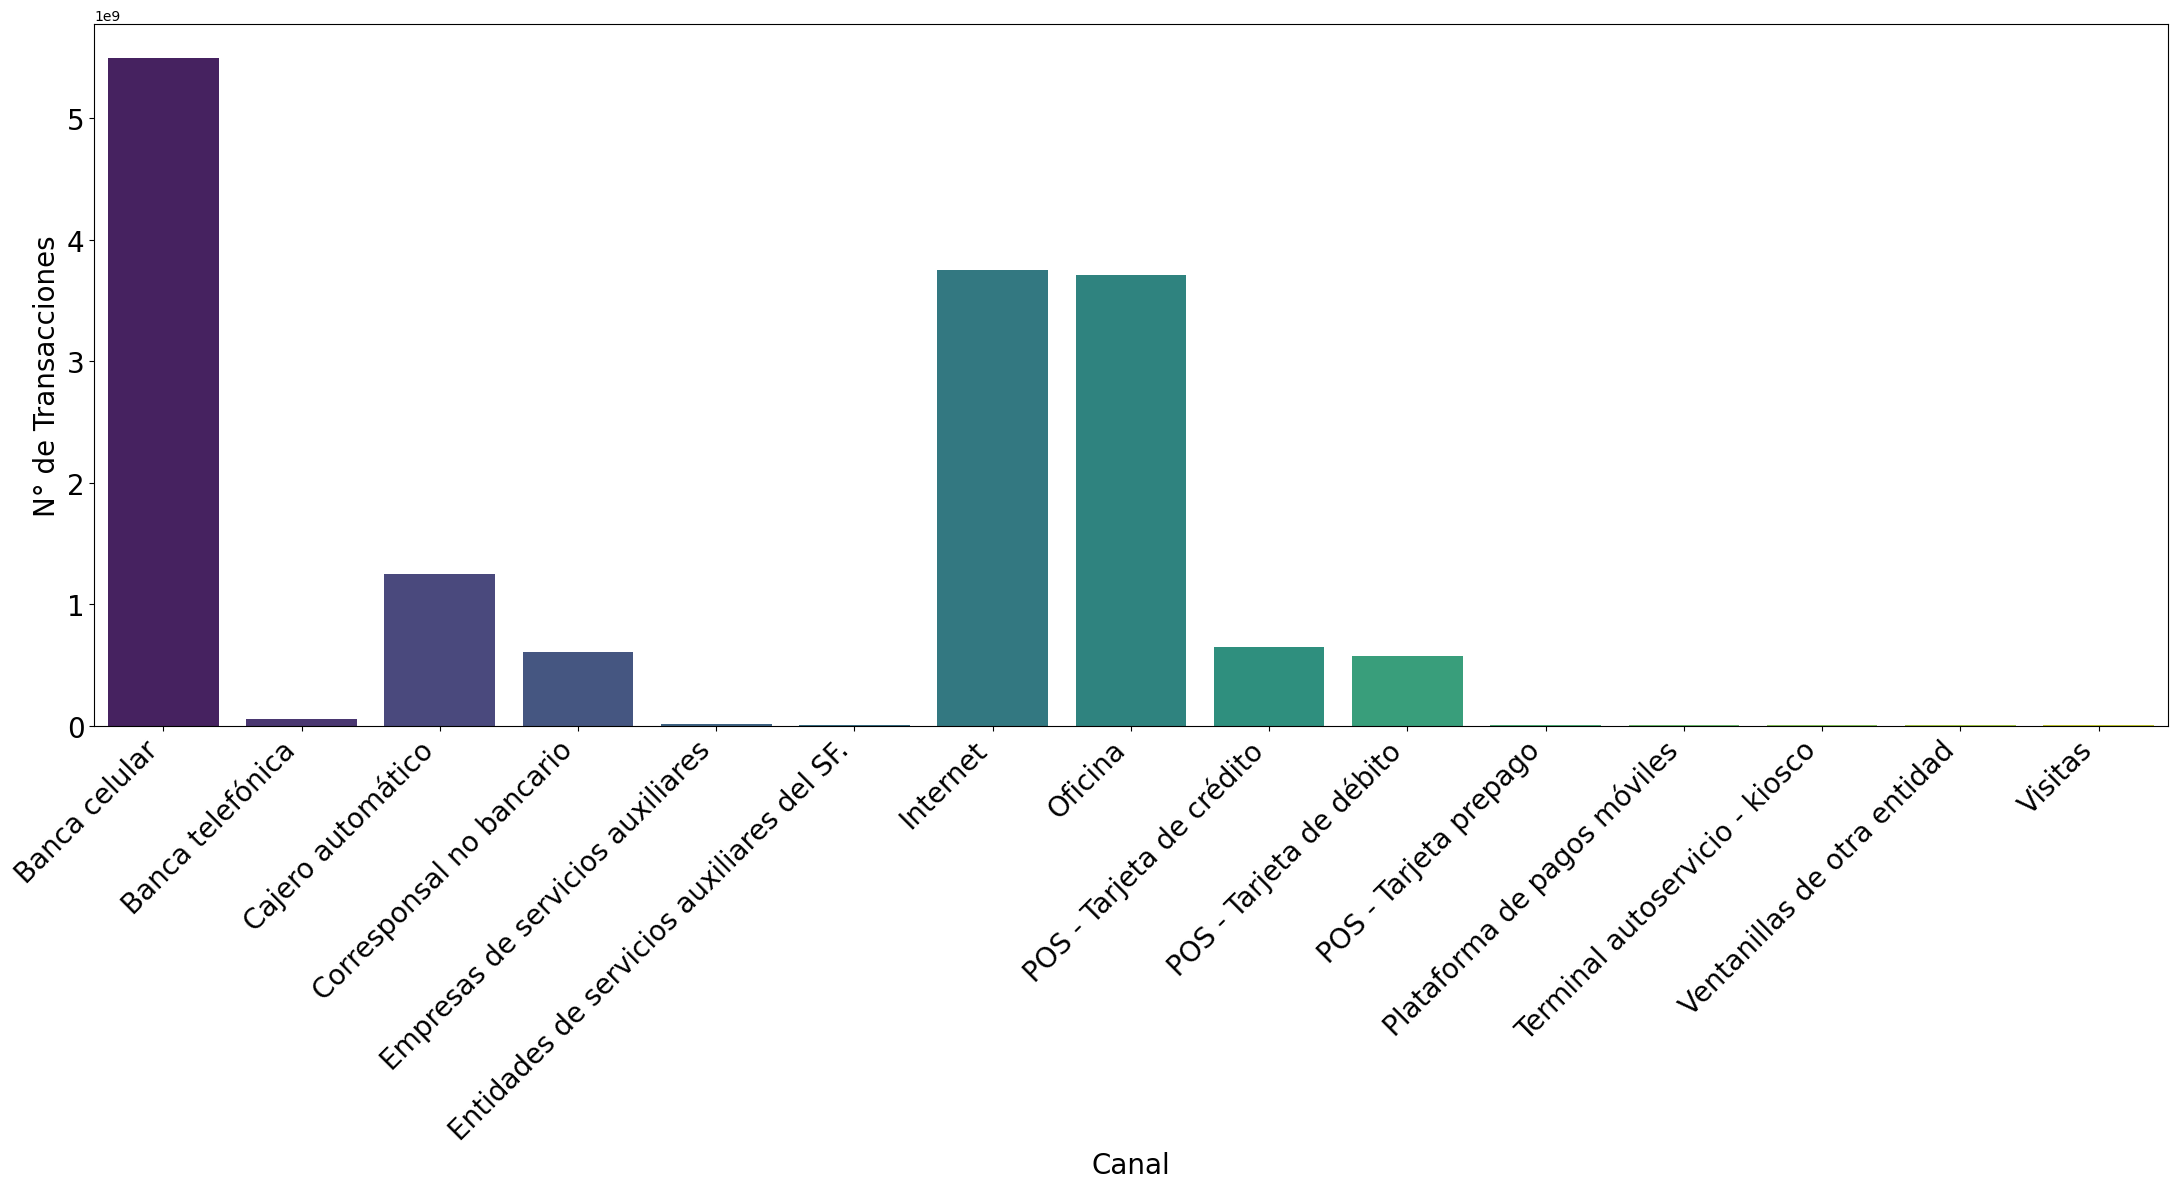

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22, 12))
sns.barplot(x=transactions_by_channel.index, y=transactions_by_channel.values, palette='viridis')
plt.xlabel('Canal',fontsize=20)
plt.ylabel('N° de Transacciones',fontsize=20)
plt.xticks(rotation=45, ha='right',fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.show()

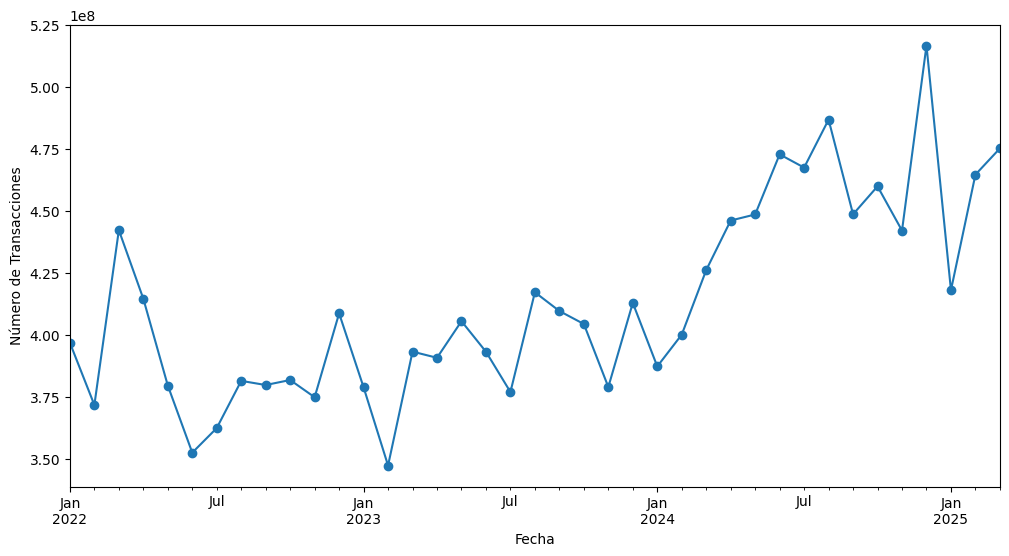

In [ ]:
import matplotlib.pyplot as plt
transactions_by_date = df.groupby(['Fecha'])['Nro. Transacciones'].sum()

plt.figure(figsize=(12,6))
transactions_by_date.plot(marker='o')
plt.xlabel("Fecha")
plt.ylabel("Número de Transacciones")
plt.grid(False)
plt.show()

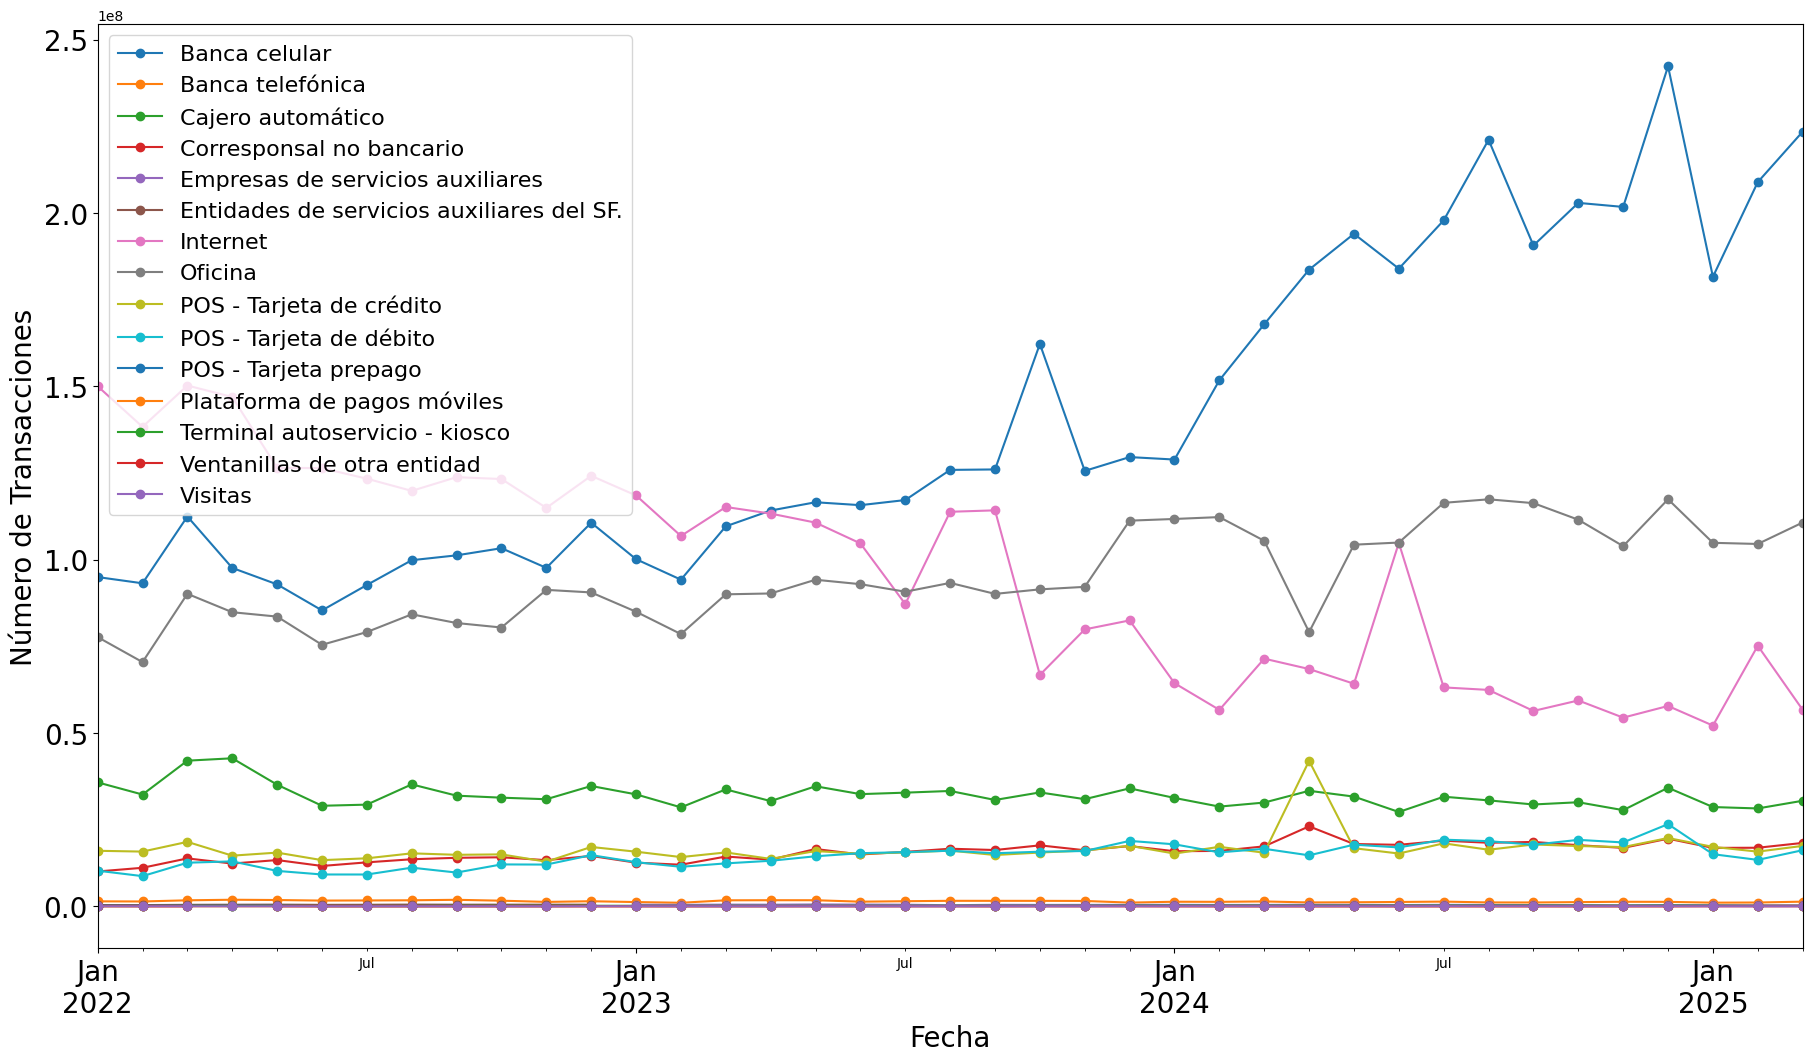

In [ ]:
import matplotlib.pyplot as plt
transactions_by_date_channel = df.groupby(['Fecha', 'Canal'])['Nro. Transacciones'].sum().unstack()

plt.figure(figsize=(22,12))
transactions_by_date_channel.plot(marker='o', ax=plt.gca())
plt.xlabel("Fecha",  fontsize=20)
plt.ylabel("Número de Transacciones",  fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(fontsize=16)
plt.grid(False)
plt.show()

In [ ]:
print("\nEvolución de las transacciones por Canal:")
transactions_by_date_channel


Evolución de las transacciones por Canal:


Canal,Banca celular,Banca telefónica,Cajero automático,Corresponsal no bancario,Empresas de servicios auxiliares,Entidades de servicios auxiliares del SF.,Internet,Oficina,POS - Tarjeta de crédito,POS - Tarjeta de débito,POS - Tarjeta prepago,Plataforma de pagos móviles,Terminal autoservicio - kiosco,Ventanillas de otra entidad,Visitas
Fecha,,,,,,,,,,,,,,,
2022-01-01,94973510.0,1439171.0,35753215.0,10052699.0,NaN,366635.0,150018762.0,77659755.0,16019228.0,10279989.0,166761.0,5687.0,89284.0,46290.0,15429.0
2022-02-01,93178713.0,1397189.0,32244380.0,11113681.0,NaN,354097.0,138308007.0,70443484.0,15788678.0,8708893.0,147827.0,13804.0,88373.0,18439.0,13695.0
2022-03-01,112444153.0,1735298.0,42013007.0,13822573.0,NaN,432874.0,150220317.0,90140285.0,18589460.0,12582118.0,160857.0,10568.0,121964.0,224.0,19469.0
2022-04-01,97609894.0,1899771.0,42701313.0,12333920.0,NaN,462286.0,146924331.0,84833874.0,14615613.0,12965192.0,161059.0,8639.0,114350.0,NaN,16072.0
2022-05-01,92862630.0,1815053.0,35082308.0,13344845.0,NaN,484453.0,126477898.0,83573448.0,15493731.0,10219029.0,171393.0,10537.0,111010.0,10638.0,18604.0
2022-06-01,85359153.0,1655640.0,29003234.0,11641557.0,NaN,426925.0,126402589.0,75433961.0,13319509.0,9184774.0,42393.0,10015.0,95063.0,10312.0,19946.0
2022-07-01,92689397.0,1692969.0,29333441.0,12682283.0,NaN,448770.0,123348193.0,79112515.0,13850379.0,9178048.0,47690.0,11623.0,102150.0,10528.0,16907.0
2022-08-01,99841356.0,1743349.0,35176358.0,13575419.0,NaN,496398.0,119838974.0,84228830.0,15282474.0,11150565.0,49635.0,12164.0,115622.0,12278.0,20287.0
2022-09-01,101239179.0,1879280.0,31919329.0,13997555.0,NaN,467315.0,123787693.0,81718397.0,14859624.0,9741007.0,52516.0,14322.0,167290.0,12217.0,17435.0


In [ ]:
df_banca_celular = df[df['Canal'] == 'Banca celular']
df_banca_celular_agrupado = df_banca_celular.groupby('Fecha')['Nro. Transacciones'].sum().reset_index()
df_banca_celular_agrupado

,Fecha,Nro. Transacciones
0,2022-01-01,94973510
1,2022-02-01,93178713
2,2022-03-01,112444153
3,2022-04-01,97609894
4,2022-05-01,92862630
5,2022-06-01,85359153
6,2022-07-01,92689397
7,2022-08-01,99841356
8,2022-09-01,101239179
9,2022-10-01,103298685


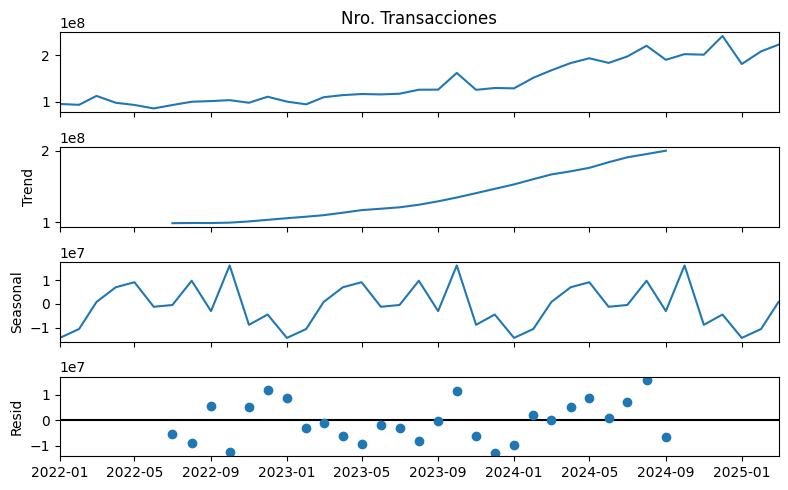

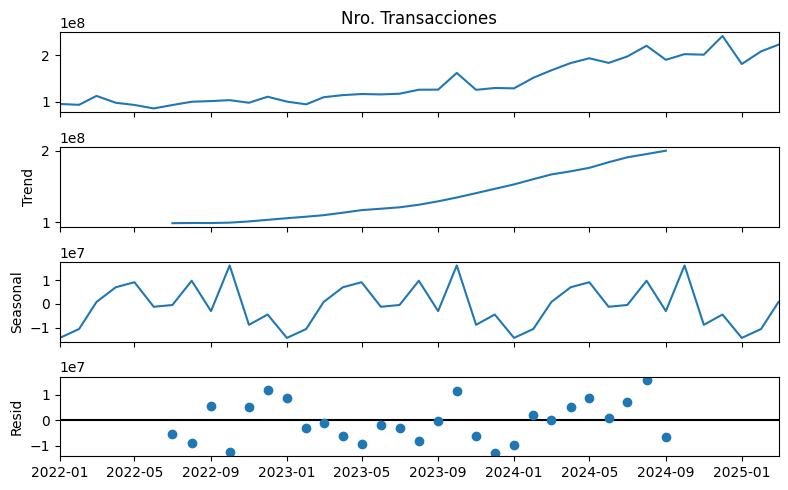

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
df_celular = df_banca_celular_agrupado.copy()
df_celular['Fecha'] = pd.to_datetime(df_celular['Fecha'])
df_celular.set_index('Fecha', inplace=True)
serie = df_celular['Nro. Transacciones']
result1 = seasonal_decompose(serie, model='additive', period=12)
result1.plot()

In [ ]:
tendencia1 = result1.trend
estacional1 = result1.seasonal
residuo1 = result1.resid


In [ ]:
tendencia1.isnull().sum()

np.int64(12)

In [ ]:
from statsmodels.tsa.stattools import adfuller
result_DF = adfuller(serie)
print('ADF Statistic: %f' % result_DF[0])
print('p-value: %f' % result_DF[1])
print('Critical Values:')
for key, value in result_DF[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.735972
p-value: 0.990529
Critical Values:
	1%: -3.633
	5%: -2.949
	10%: -2.613


In [ ]:
df_celular_dif = serie .diff(1).dropna()
df_celular_dif

,Nro. Transacciones
Fecha,
2022-02-01,-1794797.0
2022-03-01,19265440.0
2022-04-01,-14834259.0
2022-05-01,-4747264.0
2022-06-01,-7503477.0
2022-07-01,7330244.0
2022-08-01,7151959.0
2022-09-01,1397823.0
2022-10-01,2059506.0


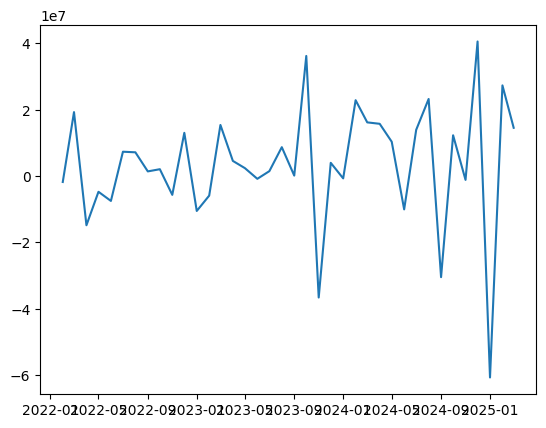

In [ ]:
plt.plot(df_celular_dif )

In [ ]:
result_DF_diff = adfuller(df_celular_dif )
print('ADF Statistic: %f' % result_DF_diff[0])
print('p-value: %f' % result_DF_diff[1])
print('Critical Values:')
for key, value in result_DF_diff[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.508983
p-value: 0.529063
Critical Values:
	1%: -3.700
	5%: -2.976
	10%: -2.628


In [ ]:
df_celular_dif3 = serie .diff(3).dropna()
df_celular_dif3

,Nro. Transacciones
Fecha,
2022-04-01,2636384.0
2022-05-01,-316083.0
2022-06-01,-27085000.0
2022-07-01,-4920497.0
2022-08-01,6978726.0
2022-09-01,15880026.0
2022-10-01,10609288.0
2022-11-01,-2215248.0
2022-12-01,9412824.0


In [ ]:
result_DF_diff = adfuller(df_celular_dif3)
print('ADF Statistic: %f' % result_DF_diff[0])
print('p-value: %f' % result_DF_diff[1])
print('Critical Values:')
for key, value in result_DF_diff[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.049210
p-value: 0.001174
Critical Values:
	1%: -3.646
	5%: -2.954
	10%: -2.616


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.rcParams["figure.figsize"] = (8,5)

Text(0.5, 1.0, 'ACF')

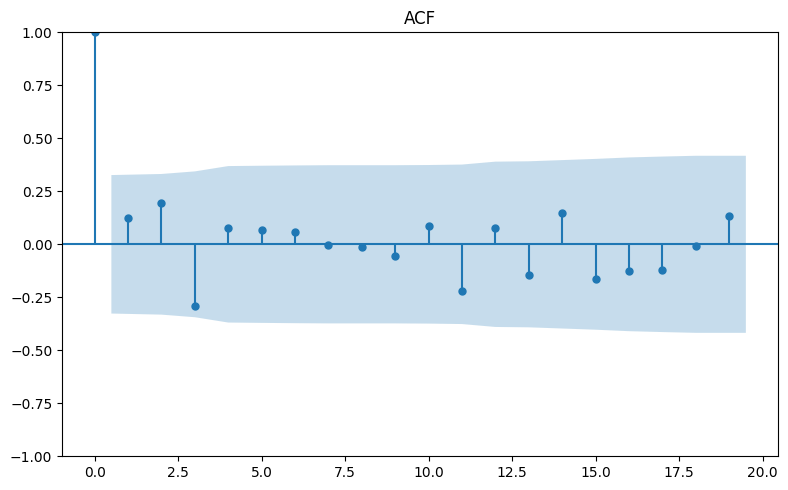

In [ ]:
plot_acf(df_celular_dif3, lags=19);
plt.tight_layout()
plt.title('ACF')

Text(0.5, 1.0, 'PACF')

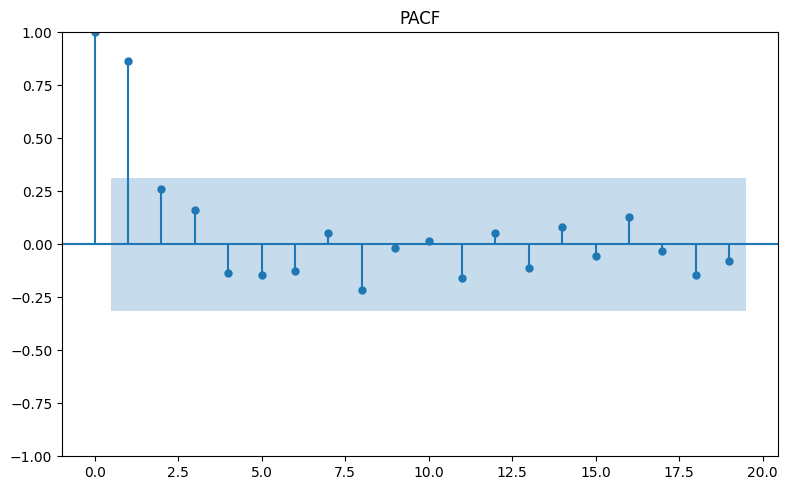

In [ ]:
plot_pacf(df_celular, lags=19);
plt.tight_layout()
plt.title('PACF')

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
modelo1 = ARIMA(df_celular_dif3, order=(1, 3, 2))
resultado1 = modelo1.fit()
print(resultado1.summary())

                               SARIMAX Results                                
Dep. Variable:     Nro. Transacciones   No. Observations:                   36
Model:                 ARIMA(1, 3, 2)   Log Likelihood                -613.547
Date:                Sun, 15 Jun 2025   AIC                           1235.095
Time:                        15:43:17   BIC                           1241.081
Sample:                    04-01-2022   HQIC                          1237.109
                         - 03-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5186      0.391     -1.327      0.185      -1.285       0.248
ma.L1         -1.8613      0.476     -3.906      0.000      -2.795      -0.927
ma.L2          0.8944      0.671      1.333      0.1

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
modelo1 = ARIMA(df_celular_dif3, order=(1, 0, 2))
resultado1 = modelo1.fit()
print(resultado1.summary())

                               SARIMAX Results                                
Dep. Variable:     Nro. Transacciones   No. Observations:                   36
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -651.518
Date:                Sun, 15 Jun 2025   AIC                           1313.035
Time:                        15:43:17   BIC                           1320.953
Sample:                    04-01-2022   HQIC                          1315.799
                         - 03-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.704e+06   7.26e-09    1.2e+15      0.000     8.7e+06     8.7e+06
ar.L1         -0.6955      0.153     -4.560      0.000      -0.994      -0.397
ma.L1          1.1833      0.276      4.290      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:

import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

order = (1, 3, 2)
seasonal_order = (1, 1, 1, 12)
model_sarimax = SARIMAX(serie, order=order, seasonal_order=seasonal_order)

results_sarimax = model_sarimax.fit()

print(results_sarimax.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                   Nro. Transacciones   No. Observations:                   39
Model:             SARIMAX(1, 3, 2)x(1, 1, [1], 12)   Log Likelihood                -444.935
Date:                              Sun, 15 Jun 2025   AIC                            901.869
Time:                                      15:43:18   BIC                            908.938
Sample:                                  01-01-2022   HQIC                           903.744
                                       - 03-01-2025                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0695      0.760     -0.091      0.927      -1.559       1.420
ma.L1         -1.74

In [ ]:

import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

order = (1, 0, 2)
seasonal_order = (1, 1, 1, 12)
model_sarimax = SARIMAX(serie, order=order, seasonal_order=seasonal_order)

results_sarimax = model_sarimax.fit()

print(results_sarimax.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                   Nro. Transacciones   No. Observations:                   39
Model:             SARIMAX(1, 0, 2)x(1, 1, [1], 12)   Log Likelihood                -491.322
Date:                              Sun, 15 Jun 2025   AIC                            994.644
Time:                                      15:43:18   BIC                           1002.419
Sample:                                  01-01-2022   HQIC                           996.955
                                       - 03-01-2025                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.008    129.370      0.000       0.985       1.015
ma.L1         -0.74

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
train_data=df_celular[0:int(len(df_celular)*0.7)]
test_data=df_celular[int(len(df_celular)*0.7):]

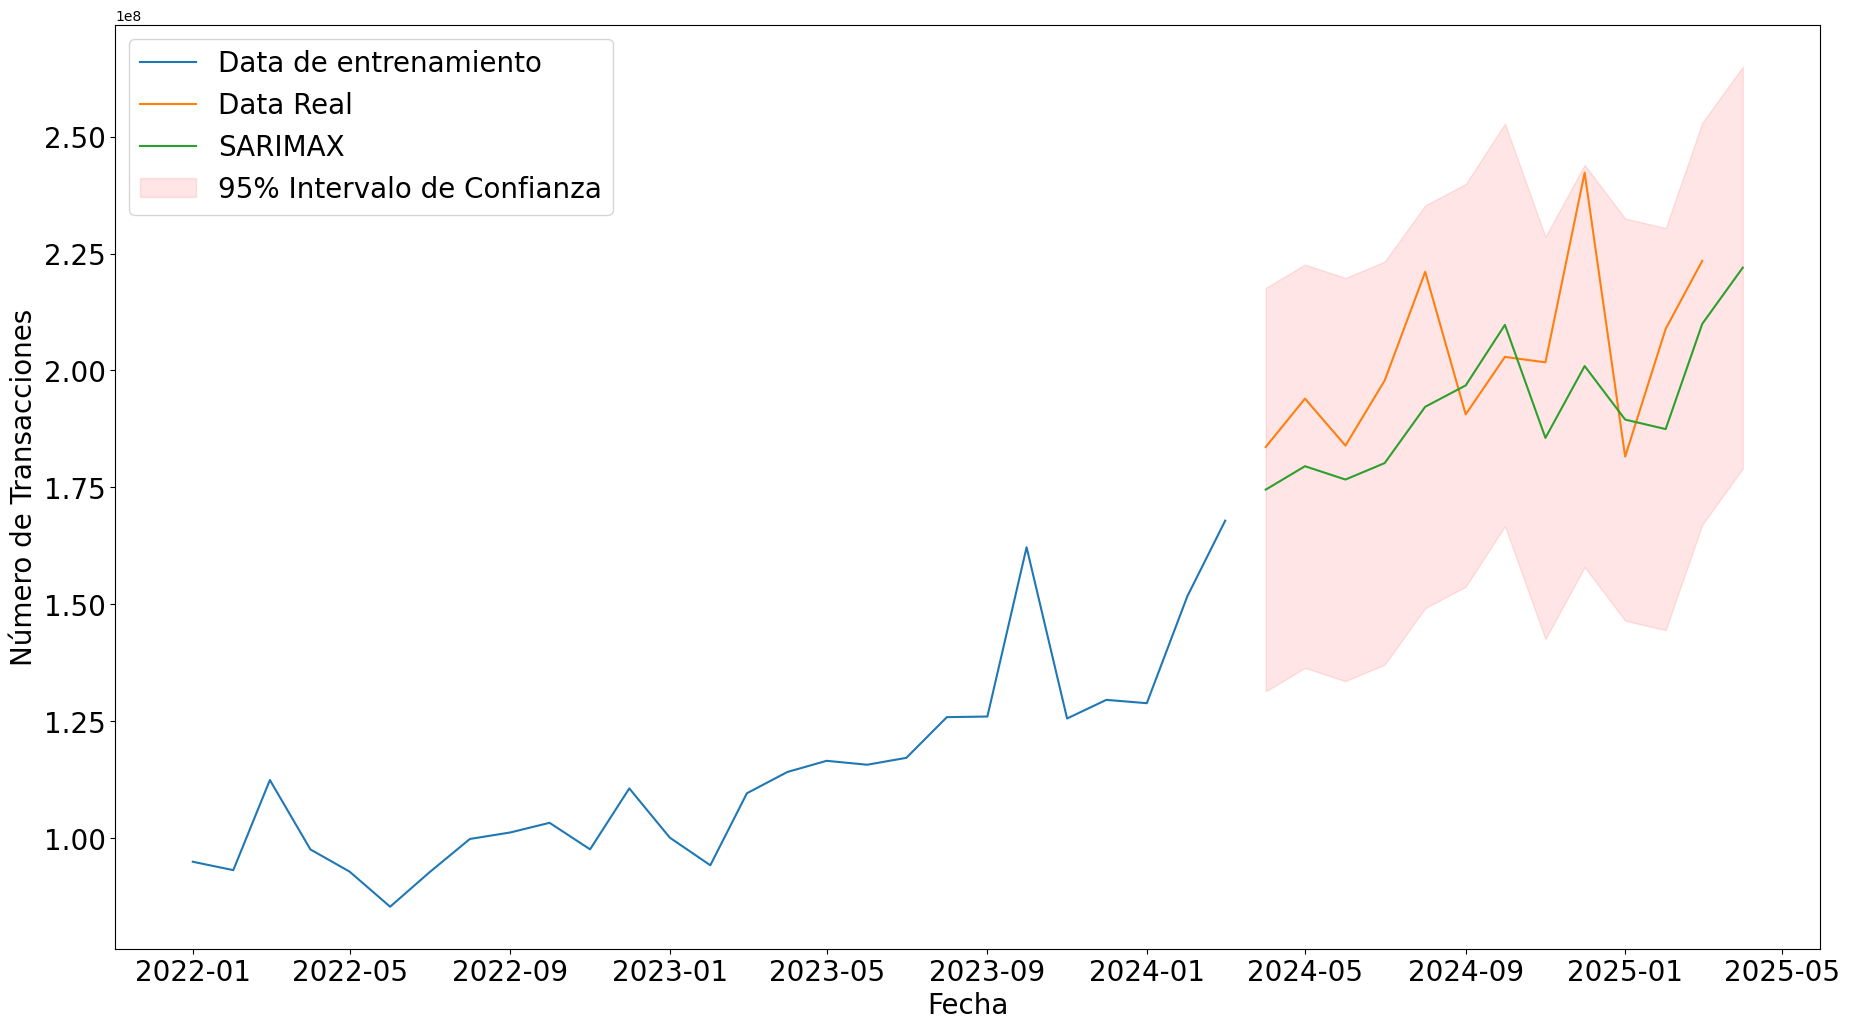

In [ ]:
import matplotlib.pyplot as plt

start_index = len(train_data)
end_index = len(df_celular)

forecast_results = results_sarimax.get_prediction(start=start_index, end=end_index, dynamic=False)


forecast = forecast_results.predicted_mean
confidence_int = forecast_results.conf_int(alpha=0.05)

plt.figure(figsize=(22, 12))
plt.plot(train_data.index, train_data['Nro. Transacciones'], label='Data de entrenamiento')
plt.plot(test_data.index, test_data['Nro. Transacciones'], label='Data Real')
plt.plot(forecast.index, forecast, label='SARIMAX')
plt.fill_between(confidence_int.index, confidence_int.iloc[:, 0], confidence_int.iloc[:, 1], color='red', alpha=0.1, label='95% Intervalo de Confianza')
plt.title('')
plt.xlabel('Fecha',fontsize=20)
plt.ylabel('Número de Transacciones',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(fontsize=20)
plt.grid(False)
plt.show()

In [ ]:
print("Valores predichos:")
print(forecast)

print("\nIntervalo de Confianza del 95%:")
confidence_int

Valores predichos:
2024-04-01    1.745288e+08
2024-05-01    1.795363e+08
2024-06-01    1.766867e+08
2024-07-01    1.802043e+08
2024-08-01    1.922440e+08
2024-09-01    1.968122e+08
2024-10-01    2.097556e+08
2024-11-01    1.855906e+08
2024-12-01    2.009550e+08
2025-01-01    1.895047e+08
2025-02-01    1.874739e+08
2025-03-01    2.099763e+08
2025-04-01    2.219971e+08
Freq: MS, Name: predicted_mean, dtype: float64

Intervalo de Confianza del 95%:


,lower Nro. Transacciones,upper Nro. Transacciones
2024-04-01,1.313856e+08,2.176720e+08
2024-05-01,1.364167e+08,2.226559e+08
2024-06-01,1.335886e+08,2.197849e+08
2024-07-01,1.371264e+08,2.232822e+08
2024-08-01,1.491851e+08,2.353028e+08
2024-09-01,1.537713e+08,2.398532e+08
2024-10-01,1.667316e+08,2.527797e+08
2024-11-01,1.425825e+08,2.285986e+08
2024-12-01,1.579547e+08,2.439552e+08
2025-01-01,1.465046e+08,2.325048e+08
